In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv("1000_Companies.csv")
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
R&D Spend          1000 non-null float64
Administration     1000 non-null float64
Marketing Spend    1000 non-null float64
State              1000 non-null object
Profit             1000 non-null float64
dtypes: float64(4), object(1)
memory usage: 39.1+ KB


In [99]:
y=df.iloc[:,-1]
print(y.tail())
print("y shape ->",y.shape)
print("y dimension ->",y.ndim)

995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, dtype: float64
y shape -> (1000,)
y dimension -> 1


In [100]:
y=df.iloc[:,-1].values
print(y[0:10])
print("y shape ->",y.shape)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96]
y shape -> (1000,)


In [101]:
X=df.iloc[:,:-1]
X1=X.copy()
X.tail()

,R&D Spend,Administration,Marketing Spend,State
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California
999,161181.72,270939.860,295442.1700,New York


In [102]:
X["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [103]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [104]:
le=LabelEncoder()

In [105]:
le.fit_transform(X.iloc[:,3])

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2,
       0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0,
       1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2,
       0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0,
       1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1,
       2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1,
       0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1,

In [106]:
X.iloc[:,3]=le.fit_transform(X.iloc[:,3])
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [107]:
onehotencoder=OneHotEncoder(categorical_features=[3])

In [108]:
X=pd.DataFrame(onehotencoder.fit_transform(X).toarray())
X.head()

D:\bharath\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42


In [109]:
X=X.iloc[:,1:]
X.head()

,1,2,3,4,5
0,0.0,1.0,165349.20,136897.80,471784.10
1,0.0,0.0,162597.70,151377.59,443898.53
2,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,1.0,0.0,142107.34,91391.77,366168.42


In [120]:
X1.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [121]:
pd.get_dummies(X1.State)

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [122]:
state=pd.get_dummies(X1.State,drop_first=True)
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [126]:
X2=pd.concat([X1,state],sort=False,axis=1)
X2.head()

,R&D Spend,Administration,Marketing Spend,State,Florida,New York
0,165349.20,136897.80,471784.10,New York,0,1
1,162597.70,151377.59,443898.53,California,0,0
2,153441.51,101145.55,407934.54,Florida,1,0
3,144372.41,118671.85,383199.62,New York,0,1
4,142107.34,91391.77,366168.42,Florida,1,0


In [130]:
X3=X2.drop(["State"],axis=1)
X3.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [131]:
from sklearn.model_selection import train_test_split
#Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
Xtrain,Xtest,ytrain,ytest=train_test_split(X3,y,test_size=0.2)
print("Xtrain ",Xtrain.shape)
print("Xtest ",Xtest.shape)
print("ytrain ",ytrain.shape)
print("ytest ",ytest.shape)

Xtrain  (800, 5)
Xtest  (200, 5)
ytrain  (800,)
ytest  (200,)


In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
model=LinearRegression()

In [134]:
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
ypred=model.predict(Xtest)
ypred

array([-23507.75270001, 141079.41418258, 164274.07152776, 168567.58372351,
        82537.50617488, 143727.16656564, 179110.2045824 , 135578.20919081,
        54427.83197475,  88301.11863658, 183173.49553363,  96861.08348461,
       118719.1215163 , 128417.16372705,  62061.30991258, 150581.91299854,
       156832.67580142, 165071.86784954, 153749.92438214, 100589.80493308,
        58654.71772777, 127170.92639125,  67899.58057428,  84091.31186914,
       184301.80927725, 111893.56797937, 161706.7995346 , 171396.41550564,
       151273.49711477, 132702.34954629, 162943.27302754, 152764.13594823,
       114737.10956259,  77701.45616834,  90336.89256002, 183478.06407532,
       155379.87305626,  83335.92369518,  99621.322085  ,  97843.184132  ,
        57834.66019751, 173853.80670791,  84910.72115546, 141544.30491468,
       183698.71015386,  59397.35328613,  82074.57412269, 104105.43170744,
       162581.58663896, 168936.20191444, 147715.24502611, 121672.95598748,
       162502.956298  , 1

In [136]:
print("Coefficient ",model.coef_)
print("Intercept ",model.intercept_)

Coefficient  [ 5.09380339e-01  1.11879124e+00  9.88182293e-02 -2.34717076e+02
  1.75415440e+02]
Intercept  -81849.06095401391


In [137]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypred)

2026.034628227012

In [138]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred)

53133183.36916059

In [139]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest,ypred))

7289.251221432871

In [140]:
from sklearn.metrics import r2_score
r2_score(ytest, ypred)

0.9656662539026084

## Visualization

In [166]:
pd.DataFrame({"Actual value":ytest,"Predicted value":ypred,"Absolute Difference":np.abs(ytest-ypred)})

,Actual value,Predicted value,Absolute Difference
0,35673.41000,-23507.752700,59181.162700
1,140237.90020,141079.414183,841.513983
2,163138.03470,164274.071528,1136.036828
3,167377.02850,168567.583724,1190.555224
4,108552.04000,82537.506175,26014.533825
5,142852.03180,143727.166566,875.134766
6,155752.60000,179110.204582,23357.604582
7,134979.73680,135578.209191,598.472391
8,55091.53354,54427.831975,663.701565
9,88302.96488,88301.118637,1.846243


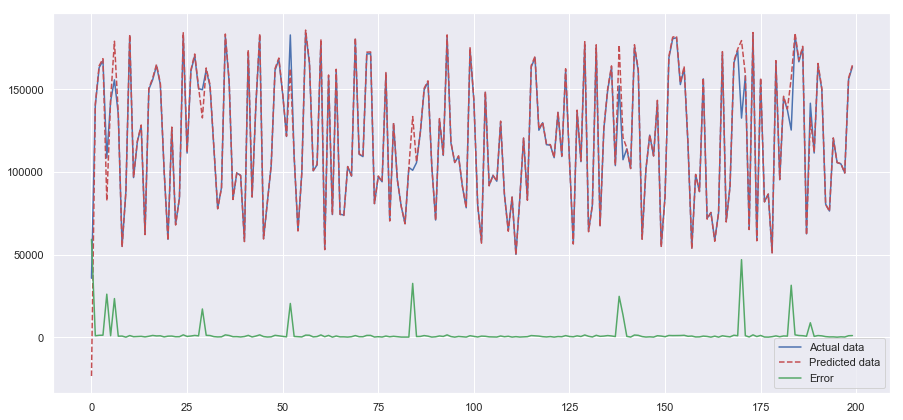

In [167]:
sns.set()
plt.figure(figsize=(15,7))
plt.plot(np.arange(len(ytest)),ytest,label="Actual data")
plt.plot(np.arange(len(ypred)),ypred,"r--",label="Predicted data")
plt.plot(np.arange(len(np.abs(ytest-ypred))),np.abs(ytest-ypred),"g",label="Error")
plt.legend()
plt.show()